In [11]:
!pip install yfinance
!pip install plotly
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install nbformat
!pip install matplotlib
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 MB 17.4 MB/s  0:00:06m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.8/296.8 MB 16.3 MB/s  0:00:18m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [xgboost]m1/2 [xgboost]


In [12]:
import yfinance as yf
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import StackingRegressor
from matplotlib import pyplot as plt
import xgboost as xgb

In [13]:
ticker_symbol = "DX-Y.NYB"
ticker = yf.Ticker( ticker_symbol )
df = ticker.history( period = "5y" ).reset_index( drop = False )
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-11-05 00:00:00-05:00,93.339996,93.550003,92.489998,92.529999,0,0.0,0.0
1,2020-11-06 00:00:00-05:00,92.570000,92.820000,92.180000,92.230003,0,0.0,0.0
2,2020-11-09 00:00:00-05:00,92.239998,92.959999,92.129997,92.730003,0,0.0,0.0
3,2020-11-10 00:00:00-05:00,92.760002,92.970001,92.599998,92.750000,0,0.0,0.0
4,2020-11-11 00:00:00-05:00,92.699997,93.209999,92.610001,93.040001,0,0.0,0.0
...,...,...,...,...,...,...,...,...
1252,2025-10-29 00:00:00-04:00,98.739998,99.360001,98.620003,99.220001,0,0.0,0.0
1253,2025-10-30 00:00:00-04:00,99.139999,99.720001,98.919998,99.529999,0,0.0,0.0
1254,2025-10-31 00:00:00-04:00,99.489998,99.839996,99.419998,99.800003,0,0.0,0.0
1255,2025-11-03 00:00:00-05:00,99.750000,99.989998,99.709999,99.870003,0,0.0,0.0


In [14]:
df_clean = df.drop( columns = [ "Volume", "Dividends", "Stock Splits" ] )

df_clean

,Date,Open,High,Low,Close
0,2020-11-05 00:00:00-05:00,93.339996,93.550003,92.489998,92.529999
1,2020-11-06 00:00:00-05:00,92.570000,92.820000,92.180000,92.230003
2,2020-11-09 00:00:00-05:00,92.239998,92.959999,92.129997,92.730003
3,2020-11-10 00:00:00-05:00,92.760002,92.970001,92.599998,92.750000
4,2020-11-11 00:00:00-05:00,92.699997,93.209999,92.610001,93.040001
...,...,...,...,...,...
1252,2025-10-29 00:00:00-04:00,98.739998,99.360001,98.620003,99.220001
1253,2025-10-30 00:00:00-04:00,99.139999,99.720001,98.919998,99.529999
1254,2025-10-31 00:00:00-04:00,99.489998,99.839996,99.419998,99.800003
1255,2025-11-03 00:00:00-05:00,99.750000,99.989998,99.709999,99.870003


# Ερώτημα 1

In [15]:
x_axis = df_clean[ "Date" ]

fig = go.Figure()

fig.add_trace( go.Scatter( x = x_axis, y = df_clean[ "Open" ], mode = "lines+markers", name = "Open" ) )
fig.add_trace( go.Scatter( x = x_axis, y = df_clean[ "Close" ], mode = "lines+markers", name = "Close" ) )
fig.add_trace( go.Scatter( x = x_axis, y = df_clean[ "High" ], mode = "lines+markers", name = "High" ) )
fig.add_trace( go.Scatter( x = x_axis, y = df_clean[ "Low" ], mode = "lines+markers", name = "Low" ) )

# Ερώτημα 2

Οι χρονοσειρές είναι προφανώς μη στατικές καθώς δεν ακολουθούν κάποιο μέσο όρο και αλλάζει συνεχώς η τυπική απόκλιση των δειγμάτων.

# Ερώτημα 3
Αν εκπαιδεύσουμε το μοντέλο στα συγκεκριμένα δεδομένα λογικά θα έχουμε αποκλίσεις. Βλέπουμε συγκεκριμένα το το 2021 ο μέσος όρος που επιδεικνύει το μοντέλο μας είναι σαφώς μικρότερος από το αντίστοιχο 2022 ή 2023.

# Ερώτημα 4
Μάλλον έχει να κάνει με τους δασμούς που είχαν σκοπό να εφαρμόσουν οι ΗΠΑ εκείνη την περίοδο.

# Ερώτημα 5
Είναι δυνατόν εφόσον έχει μοντελοποιηθεί ερπαρκώς η συνάρτηση μέσω της εκπαίδευσης. Πάλι όμως θα ήταν πολύ πιο χρήσιμο να μπορούσαμε να χρησιμοποιήσουμε τα δεδομένα και άλλα ημερών.

# Ερώτημα 6
Όχι δεν έχει νόημα καθώς θα θέλαμε να κρατήσουμε την χρονική σχέση των δεδομένων.

# Ερώτημα 7

In [16]:
mask_2024 = ( df_clean[ "Date" ] >= "2024-01-01" )
df_train = df_clean.drop( columns = ["Date"] ).loc[ ~mask_2024 ]
df_test = df_clean.drop( columns = ["Date"] ).loc[ mask_2024 ]

y_train = df_train[ "Close" ]
y_test = df_test[ "Close" ]
x_train = df_train
x_test = df_test

df_train.shape

(792, 4)

# Ερώτημα 8

In [17]:
def getDataFromWindow( data_x, data_y, window_size ):
	np_x = data_x.to_numpy()
	cols = data_x.shape[1]
	x = np.zeros( ( len( data_x ) - window_size, window_size*cols ) )
	for i in range( len( data_x ) - window_size ):
		for j in range( window_size ):
			for k in range( cols ):
				x[i, j*cols + k ] = np_x[i + j, k ]
	
	return x, data_y[ window_size: ].to_numpy()

x_temp, y_temp = getDataFromWindow( x_train, y_train, 3 )


# Ερώτημα 9
Εξαρτάται, αν θέλουμε προβλέψεις σε βάθος ημέρας τότε μας βολεύει ένα μικρό παράθυρο. Αντίθετα αν θέλουμε αποτελέσματα για βάθη χρόνου τότε θέλουμε μεγάλα παράθυρα.

# Ερώτημα 10
Η συνάρτηση έχει ήδη υλοποιηθεί οπότε απλά δημιουργούμε τα δεδομένα μας και επαληθεύουμε την ορθότητα τους

In [18]:
window = 5
x_train_data, y_train_data = getDataFromWindow( x_train, y_train, window )
x_test_data, y_test_data = getDataFromWindow( x_test, y_test, window )

print( "Dimensions of x_train_data: ", x_train_data.shape )
print( "Dimensions of y_train_data: ", y_train_data.shape )
print( "First row of x_train_data: \n", x_train_data[ 0, : ] )
print( df_clean[:5] )
print( "First value of y_train_data: ", y_train_data[ 0 ] )

Dimensions of x_train_data:  (787, 20)
Dimensions of y_train_data:  (787,)
First row of x_train_data: 
 [93.33999634 93.55000305 92.48999786 92.52999878 92.56999969 92.81999969
 92.18000031 92.23000336 92.23999786 92.95999908 92.12999725 92.73000336
 92.76000214 92.97000122 92.59999847 92.75       92.69999695 93.20999908
 92.61000061 93.04000092]
                       Date       Open       High        Low      Close
0 2020-11-05 00:00:00-05:00  93.339996  93.550003  92.489998  92.529999
1 2020-11-06 00:00:00-05:00  92.570000  92.820000  92.180000  92.230003
2 2020-11-09 00:00:00-05:00  92.239998  92.959999  92.129997  92.730003
3 2020-11-10 00:00:00-05:00  92.760002  92.970001  92.599998  92.750000
4 2020-11-11 00:00:00-05:00  92.699997  93.209999  92.610001  93.040001
First value of y_train_data:  92.95999908447266


# Ερώτημα 11

In [19]:
from sklearn.metrics import mean_absolute_error


class TrainingResults:
    def __init__(self):
        self.training_data_accuracy = 0.
        self.test_data_accuracy = 0.

def modelTrain( model, x_train = x_train_data, y_train = y_train_data, x_test = x_test_data, y_test = y_test_data ):
    ret = TrainingResults()
    model.fit( x_train, y_train )
    ret.training_data_accuracy = mean_absolute_error( y_train, model.predict( x_train ) )
    ret.test_data_accuracy = mean_absolute_error( y_test, model.predict( x_test ) )

    return ret
    


Linear Regression Training Data Accuracy: 0.3429
Linear Regression Test Data Accuracy: 0.3425
Random Forest Training Data Accuracy: 0.1483
Random Forest Test Data Accuracy: 0.4022
Bagging with linear regressor Training Data Accuracy: 0.3438
Bagging with linear regressor Test Data Accuracy: 0.3388
Stacking Training Data Accuracy: 0.3558
Stacking Test Data Accuracy: 0.3435
XGBoost Training Data Accuracy: 0.0154
XGBoost Test Data Accuracy: 0.4829


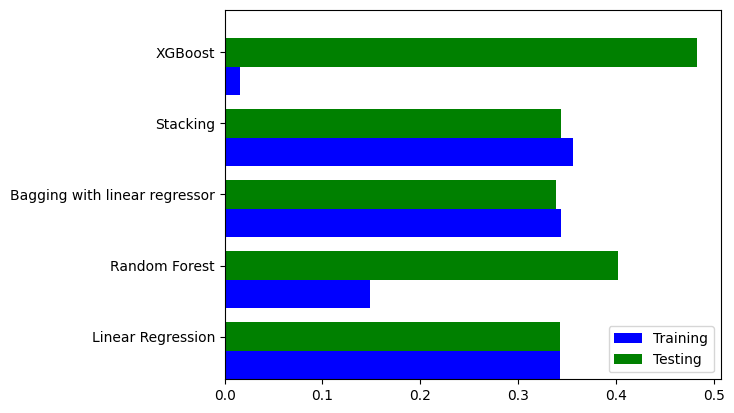

In [35]:
def printAccuracies( model_name, results ):
    print( f"{model_name} Training Data Accuracy: {results.training_data_accuracy:.4f}" )
    print( f"{model_name} Test Data Accuracy: {results.test_data_accuracy:.4f}" )

def modelsPredictions( x_train = x_train_data, y_train = y_train_data, x_test = x_test_data, y_test = y_test_data ):
    accuracies = []
    linear_model = LinearRegression( n_jobs = -1 )
    linear_results = modelTrain( linear_model, x_train, y_train, x_test, y_test )
    accuracies.append( ( "Linear Regression", linear_results ) )

    random_forest_model = RandomForestRegressor( n_jobs = -1 )
    random_forest_results = modelTrain( random_forest_model, x_train, y_train, x_test, y_test )
    accuracies.append( ( "Random Forest", random_forest_results ) )

    bagging_linear_model = BaggingRegressor( estimator = LinearRegression(), n_jobs = -1, n_estimators=100, max_features = 0.8 )
    bagging_linear_results = modelTrain( bagging_linear_model, x_train, y_train, x_test, y_test )
    accuracies.append( ( "Bagging with linear regressor", bagging_linear_results ) )

    stacking_model = StackingRegressor( estimators = [("lr", LinearRegression()), ("rf", RandomForestRegressor())], n_jobs = -1 )
    stacking_results = modelTrain( stacking_model, x_train, y_train, x_test, y_test )
    accuracies.append( ( "Stacking", stacking_results ) )

    xgboost_model = xgb.XGBRegressor( n_jobs = -1 )
    xgboost_results = modelTrain( xgboost_model, x_train, y_train, x_test, y_test )
    accuracies.append( ( "XGBoost", xgboost_results ) )

    return accuracies

accuracies = modelsPredictions()

for acc in accuracies:
    printAccuracies( acc[0], acc[1] )
    
ind = np.arange(len(accuracies))
width = 0.4
fig, ax = plt.subplots()
ax.barh( ind, [ acc[1].training_data_accuracy for acc in accuracies ], width, color = 'blue', label = "Training" )
ax.barh( ind + width, [ acc[1].test_data_accuracy for acc in accuracies ], width, color = 'green', label = "Testing" )
ax.set(yticks=ind + width, yticklabels=[ acc[0] for acc in accuracies ], ylim=[2*width - 1, len(accuracies)])
ax.legend()

plt.show()


- Linear Regression: Σε αυτήν την περίπτωση προσπαθούμε να κάνουμε fit ένα υπερεπίπεδο στα δεδομένα και με βάση αυτό να βγάλουμε μία εκτίμηση.
- Random Forest: Διαλέγει τυχαία χαρακτηριστικά και φτιάχνει πολλά δέντρα, η τελική απόφαση βγαίνει μέσα από έναν μέσο όρο.
- Bagging with linear regressor: Διαλέγουμε πάλι τυχαία χαρακτηριστικά και φτιάχνουμε μοντέλα το τελικό αποτέλεσμα των οποίων εξαρτάται από το μέσο όρο, που βγάζουν.
- Stacking: Το stacking είναι μία τεχνική η οποία χτίζει πολλά μοντέλα και ένα τελικό, το οποίο συνδέεται στις εξόδους των μοντέλων. Το τελικό μοντέλο εκπαιδεύεται στις εξόδους των τελικών.
- XGBoost: Χρησιμοποιεί την Newton-Raphson για να βελτιστοποιήσει την εκπαίδευση ενός δέντρου. Σε κάθε επανάληψη ο αλγόριθμος μαθαίνει να διορθώνει σταδιακά τα σφάλματα της προηγούμενης επανάληψης

# Ερώτημα 12

## a)

Linear Regression Training Data Accuracy: 0.3429
Linear Regression Test Data Accuracy: 0.3425
Random Forest Training Data Accuracy: 0.1452
Random Forest Test Data Accuracy: 0.4012
Bagging with linear regressor Training Data Accuracy: 0.3442
Bagging with linear regressor Test Data Accuracy: 0.3397
Stacking Training Data Accuracy: 0.3555
Stacking Test Data Accuracy: 0.3439
XGBoost Training Data Accuracy: 0.0154
XGBoost Test Data Accuracy: 0.4829


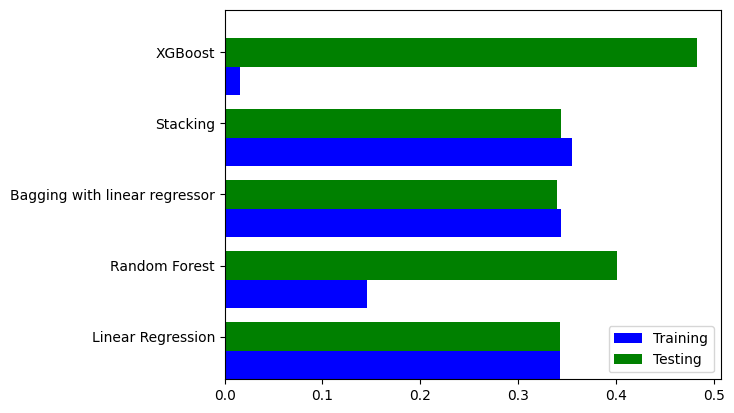

In [37]:
df_clean['DayOfWeek'] = df_clean['Date'].dt.dayofweek
df_clean['Month'] = df_clean['Date'].dt.month

df_train = df_clean.drop( columns = ["Date"] ).loc[ ~mask_2024 ]
df_test = df_clean.drop( columns = ["Date"] ).loc[ mask_2024 ]

y_train = df_train[ "Close" ]
y_test = df_test[ "Close" ]
x_train = df_train
x_test = df_test

x_train_data, y_train_data = getDataFromWindow( x_train, y_train, window )
x_test_data, y_test_data = getDataFromWindow( x_test, y_test, window )

accuracies = modelsPredictions( x_train_data, y_train_data, x_test_data, y_test_data )

for acc in accuracies:
    printAccuracies( acc[0], acc[1] )
    
ind = np.arange(len(accuracies))
width = 0.4
fig, ax = plt.subplots()
ax.barh( ind, [ acc[1].training_data_accuracy for acc in accuracies ], width, color = 'blue', label = "Training" )
ax.barh( ind + width, [ acc[1].test_data_accuracy for acc in accuracies ], width, color = 'green', label = "Testing" )
ax.set(yticks=ind + width, yticklabels=[ acc[0] for acc in accuracies ], ylim=[2*width - 1, len(accuracies)])
ax.legend()

plt.show()


# b)

In [ ]:
df_log_returns = df.copy()
for col in ['Open', 'High', 'Low', 'Close']:
    df_log_returns[col] = np.log(1 + df_log_returns[col].pct_change())
    # df_log_returns[col] = df_log_returns[col]

print( df_log_returns )

df_train = df_log_returns.drop( columns = ["Date"] ).loc[ ~mask_2024 ]
df_test = df_log_returns.drop( columns = ["Date"] ).loc[ mask_2024 ]

y_train = df_train[ "Close" ]
y_test = df_test[ "Close" ]
x_train = df_train
x_test = df_test

x_train_data, y_train_data = getDataFromWindow( x_train, y_train, window )
x_test_data, y_test_data = getDataFromWindow( x_test, y_test, window )

accuracies = modelsPredictions( x_train_data, y_train_data, x_test_data, y_test_data )

for acc in accuracies:
    printAccuracies( acc[0], acc[1] )
    
ind = np.arange(len(accuracies))
width = 0.4
fig, ax = plt.subplots()
ax.barh( ind, [ acc[1].training_data_accuracy for acc in accuracies ], width, color = 'blue', label = "Training" )
ax.barh( ind + width, [ acc[1].test_data_accuracy for acc in accuracies ], width, color = 'green', label = "Testing" )
ax.set(yticks=ind + width, yticklabels=[ acc[0] for acc in accuracies ], ylim=[2*width - 1, len(accuracies)])
ax.legend()

plt.show()

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values